In [1]:
import torch
from torchvision.datasets import CIFAR10

In [2]:
ds = CIFAR10 (root = "data", train =True, download =True)
test_ds = CIFAR10 (root= "data", train=False, download= True)
classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(f" Train datasetda {len(ds)}ta rasm bor.")
print(f" Test datasetda {len(test_ds)}ta rasm bor.")
print(f" CIFAR10 datasetida {len(classes)}ta nom bor.")


 Train datasetda 50000ta rasm bor.
 Test datasetda 10000ta rasm bor.
 CIFAR10 datasetida 10ta nom bor.


In [4]:
data = ds[20000]
len(data)

2

In [5]:
type(data[0])

PIL.Image.Image

In [6]:
type(data[1])

int

In [7]:
rasm, raqam = data[0], data[1]
print(rasm.size)
print(raqam)

(32, 32)
8


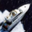

In [8]:
display(rasm)

In [9]:
import numpy as np
rasm_array = np.array(rasm)
rasm_array

array([[[ 26,  23,  32],
        [ 17,  14,  25],
        [ 13,   9,  24],
        ...,
        [ 15,  14,  28],
        [ 24,  24,  37],
        [ 22,  21,  34]],

       [[ 20,  17,  26],
        [ 13,  10,  22],
        [ 13,   9,  24],
        ...,
        [ 19,  17,  35],
        [ 21,  20,  35],
        [ 29,  29,  39]],

       [[ 14,  11,  20],
        [ 13,  10,  21],
        [ 13,   9,  23],
        ...,
        [ 17,  16,  32],
        [ 25,  24,  38],
        [ 31,  31,  42]],

       ...,

       [[ 90, 109, 137],
        [ 34,  64,  95],
        [ 28,  54,  90],
        ...,
        [ 23,  20,  37],
        [ 16,  13,  30],
        [  9,   6,  23]],

       [[ 79, 105, 141],
        [ 58,  96, 139],
        [ 32,  68, 110],
        ...,
        [ 14,  11,  28],
        [ 16,  13,  30],
        [ 10,   7,  24]],

       [[128, 157, 196],
        [ 58,  93, 149],
        [ 25,  60, 106],
        ...,
        [ 13,  10,  27],
        [ 12,   9,  26],
        [ 13,  10,  27]]

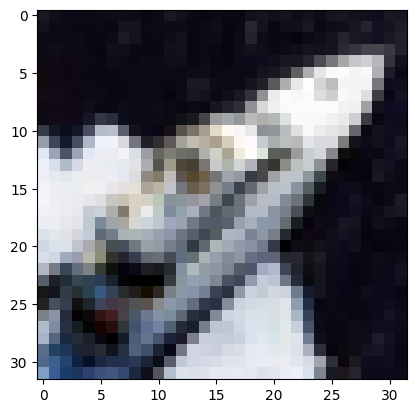

In [10]:
from matplotlib import pyplot as plt
plt.imshow(rasm, cmap = "gray" )

In [11]:
from torchvision import transforms as tfs
tr_ts = tfs.Compose([tfs.ToTensor(),
  tfs.Normalize(0.5, 0.5, 0.5)])



test_ts = tfs.Compose([tfs.ToTensor(),
                       tfs.Normalize(0.5, 0.5, 0.5)])


ds = CIFAR10 (root="data", train= True, transform= tr_ts, download = True)
test_ds = CIFAR10(root= "data", train= False, transform= test_ts, download=True)

classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Files already downloaded and verified
Files already downloaded and verified


In [12]:
data = ds[5000]
rasm, raqam = data[0], data[1]
torch.unique(rasm)

tensor([-1.0000, -0.9922, -0.9843, -0.9765, -0.9686, -0.9608, -0.9529, -0.9451,
        -0.9373, -0.9294, -0.9216, -0.9137, -0.9059, -0.8980, -0.8902, -0.8824,
        -0.8745, -0.8667, -0.8588, -0.8510, -0.8431, -0.8353, -0.8275, -0.8196,
        -0.8118, -0.8039, -0.7961, -0.7882, -0.7804, -0.7725, -0.7647, -0.7569,
        -0.7490, -0.7412, -0.7333, -0.7255, -0.7176, -0.7098, -0.7020, -0.6941,
        -0.6863, -0.6784, -0.6706, -0.6627, -0.6549, -0.6471, -0.6392, -0.6314,
        -0.6235, -0.6157, -0.6078, -0.6000, -0.5922, -0.5843, -0.5765, -0.5686,
        -0.5608, -0.5529, -0.5451, -0.5373, -0.5294, -0.5216, -0.5137, -0.5059,
        -0.4980, -0.4902, -0.4824, -0.4745, -0.4667, -0.4588, -0.4510, -0.4431,
        -0.4353, -0.4275, -0.4196, -0.4118, -0.4039, -0.3961, -0.3882, -0.3804,
        -0.3725, -0.3647, -0.3569, -0.3490, -0.3412, -0.3333, -0.3255, -0.3176,
        -0.3098, -0.3020, -0.2941, -0.2863, -0.2784, -0.2706, -0.2627, -0.2549,
        -0.2471, -0.2392, -0.2314, -0.22

In [13]:
import random

def tensor_2_im(t, t_type = "rgb"):

    gray_tfs = tfs.Compose([tfs.Normalize(mean = [ 0.], std = [1/0.5]), tfs.Normalize(mean = [-0.5], std = [1])])
    # rgb_tfs = tfs.Compose([tfs.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]), tfs.Normalize(mean = [ -0.485, -0.456, -0.406 ], std = [ 1., 1., 1. ])])
    rgb_tfs = tfs.Compose([tfs.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.5, 1/0.5, 1/0.5 ]), tfs.Normalize(mean = [ -0.5, -0.5, -0.5 ], std = [ 1., 1., 1. ])])

    invTrans = gray_tfs if t_type == "gray" else rgb_tfs

    return (invTrans(t) * 255).detach().squeeze().cpu().permute(1,2,0).numpy().astype(np.uint8) if t_type == "gray" else (invTrans(t) * 255).detach().cpu().permute(1,2,0).numpy().astype(np.uint8)


def visualize(data, rasmlar_soni, qatorlar, cmap = None, klass_nomlari = None):

    assert cmap in ["rgb", "gray"], "Rasmni oq-qora yoki rangli ekanini aniqlashtirib bering!"
    if cmap == "rgb": cmap = "viridis"

    plt.figure(figsize = (20, 10))
    indekslar = [random.randint(0, len(data) - 1) for _ in range(rasmlar_soni)]
    for idx, indeks in enumerate(indekslar):

        im, gt = data[indeks]
        # Start plot
        plt.subplot(qatorlar, rasmlar_soni // qatorlar, idx + 1)
        if cmap:
            plt.imshow(tensor_2_im(im, cmap), cmap=cmap)
        else:
            plt.imshow(tensor_2_im(im))
        plt.axis('off')
        if klass_nomlari is not None:
            plt.title (klass_nomlari[gt])
        else:
            plt.title(f"GT -> {gt}")

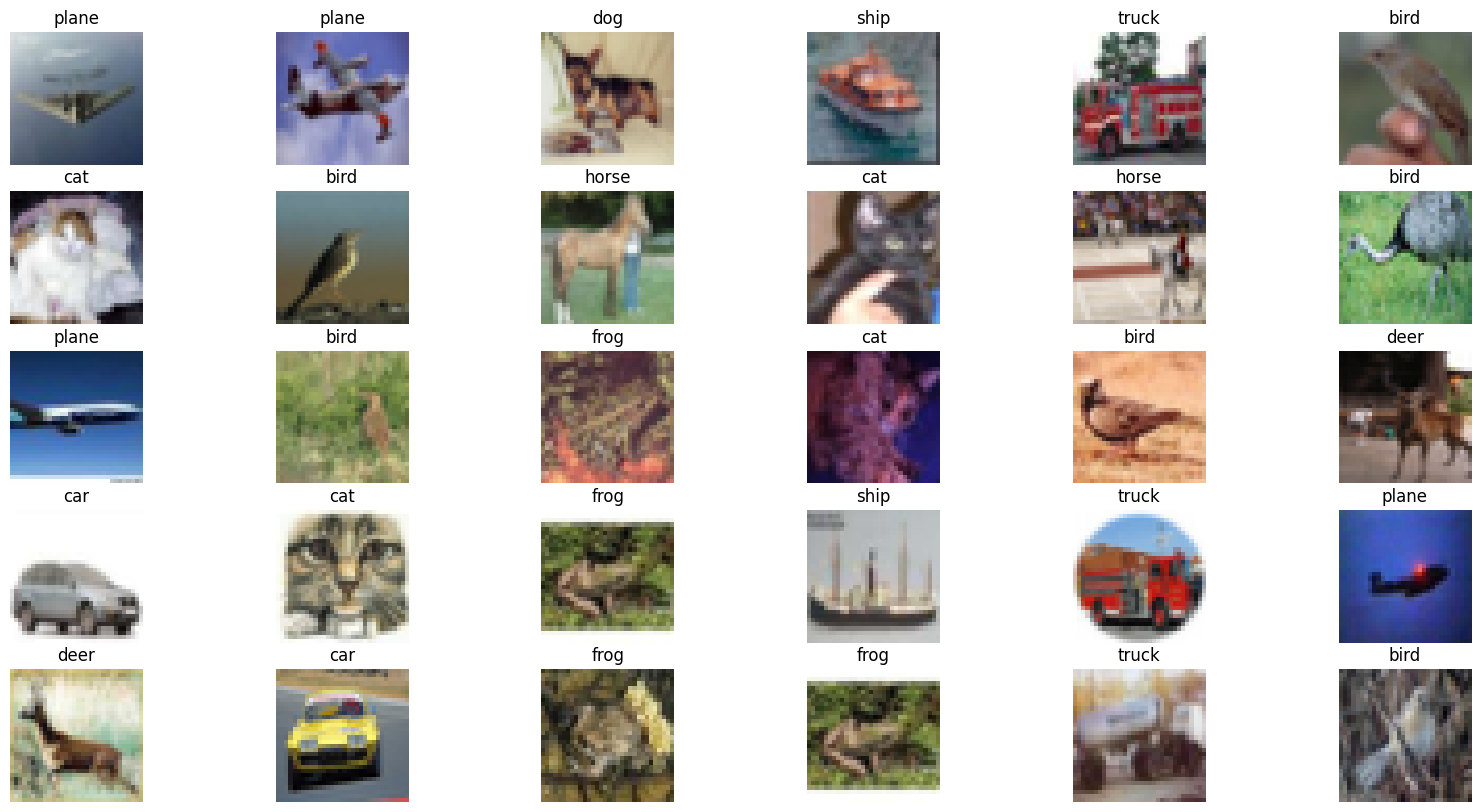

In [14]:
visualize(data = ds, rasmlar_soni = 30, qatorlar = 5, cmap = 'rgb', klass_nomlari = classes)

In [15]:
from torch.utils.data import random_split, DataLoader

tr_length = int(len(ds) * 0.8 )
tr_ds, val_ds = random_split(dataset= ds, lengths = [tr_length, len(ds) - tr_length])
print(f"Train datasetda {len(tr_ds)} ta batch bor.")
print(f"Validation datasetda {len(val_ds)} ta batch bor.")
print(f"Train datasetda {len(test_ds)} ta batch bor.")

Train datasetda 40000 ta batch bor.
Validation datasetda 10000 ta batch bor.
Train datasetda 10000 ta batch bor.


In [21]:
bs = 128
tr_dl = DataLoader(dataset = tr_ds, batch_size = bs, shuffle = True, num_workers = 4, drop_last = False) # cpu lar soni
val_dl = DataLoader(dataset = val_ds, batch_size = bs, shuffle = False, num_workers = 4)
test_dl = DataLoader(dataset = test_ds, batch_size = bs, shuffle = False, num_workers = 4)
print(f"Train dataloader {len(tr_dl)}ta batch bor.")
print(f"Validation dataloaderda {len(val_dl)}ta batch bor.")
print(f"Test dataloaderda {len(test_dl)}ta batch bor.")

Train dataloader 313ta batch bor.
Validation dataloaderda 79ta batch bor.
Test dataloaderda 79ta batch bor.


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [22]:
import torch
from torch import nn


class Model(nn.Module):



    def __init__(self, in_chs, out_chs,in_fs, ks,s, p, n_cls) :
        super().__init__()

        self.conv_1 = nn.Conv2d(in_channels=in_chs, out_channels = out_chs, kernel_size=ks, stride= s, padding = p)
        self.conv_2 = nn.Conv2d(in_channels=out_chs, out_channels = out_chs*2, kernel_size=ks, stride= s, padding = p)
        self.conv_3 = nn.Conv2d(in_channels=out_chs*2, out_channels = out_chs*4, kernel_size=ks, stride= s, padding = p)

        self.linear_1 = nn.Linear(in_features=in_fs, out_features= in_fs // 2)
        self.linear_2 = nn.Linear(in_features=in_fs //2 , out_features= n_cls)
        self.act = nn.ReLU()
        self.mp = nn.MaxPool2d(kernel_size =2, stride = 2)


    def forward(self, inp):

      out = self.conv_1(inp)
      out = self.act(out)
      out = self.mp(out)

      out = self.conv_2(out)
      out = self.act(out)
      out = self.mp(out)

      out = self.conv_3(out)
      out = self.act(out)
      out = self.mp(out)

      print(out.shape)

      bs= inp.shape[0]
      out = out.view(bs, -1)

      out= self.linear_1(out)
      out = self.act(out)
      out = self.linear_2(out)

      return out

rasm = torch.rand(1, 3, 32, 32)
model = Model(in_chs = 3, out_chs=8, in_fs= 512 , ks=3 , s=1, p=1, n_cls=10)
model(rasm).shape

torch.Size([1, 32, 4, 4])


torch.Size([1, 10])

In [41]:
!pip install timm
import timm , torch

model = timm.create_model(model_name = "efficientnet_b0", pretrained = True, num_classes = len(classes))
inp = torch.rand (1, 3, 32, 32)
model.eval()
model(inp)

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

tensor([[ 2.2023,  2.1718,  1.3650,  0.5380,  1.1599, -1.8643,  1.2635, -1.2103,
          0.0513, -0.3296]], grad_fn=<AddmmBackward0>)

In [57]:
import timm , torch

model = timm.create_model(model_name = "rexnet_150", pretrained = True, num_classes = len(classes))
inp = torch.rand (1, 3, 32, 32)
model.eval()
model(inp)

tensor([[ 4.6429,  4.7518, -3.2274, -1.6401,  4.5115,  7.9650,  0.8876, -6.2545,
          3.2161,  1.1669]], grad_fn=<AddmmBackward0>)

In [59]:
import timm , torch

model = timm.create_model(model_name = "resnet18", pretrained = True, num_classes = len(classes))
inp = torch.rand (1, 3, 32, 32)
model.eval()
model(inp)

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

tensor([[-0.1779, -0.3486, -0.1549, -0.5319, -0.3685,  0.0594,  0.2732,  0.1245,
         -0.1533, -0.5030]], grad_fn=<AddmmBackward0>)

In [42]:
epochs = 1
device = "cpu"
model.to(device)
model.train()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [43]:
from tqdm import tqdm
import os

best_acc = 0
prefix = "CIFAR10"




for epoch in range (epochs):

  model.train()
  print(f" { epoch + 1} - epoch jarayonlari boshlandi")

  epoch_loss, epoch_acc, total = 0, 0, 0

  for i , batch in tqdm(enumerate(tr_dl)):
    rasm, gts = batch
    rasm , gts = rasm.to(device), gts.to(device)
    total += rasm.shape[0]


    preds = model(rasm)
    loss = loss_fn(preds, gts)
    pred_cls = torch.argmax(preds.data, dim = 1)
    epoch_acc += (pred_cls == gts).sum().item()
    epoch_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
  print(f"{epoch +1 }- epoch train jarayoni natijalari :")
  print(f" {epoch +1}- epochdagi train loss     -> {(epoch_loss / len(tr_dl)):.3f}")
  print(f" {epoch +1}- epochdagi train accuracy     -> {(epoch_acc / total):.3f}")



  model.eval()
  with torch.no_grad():
      val_epoch_loss, val_epoch_acc, val_total = 0, 0, 0

      for idx, batch in tqdm(enumerate(val_dl)):
        rasm, gts = batch
        rasm, gts = rasm.to(device),  gts.to(device)
        val_total += rasm.shape[0]

        preds = model(rasm)
        loss = loss_fn(preds, gts)
        pred_cls = torch.argmax(preds.data, dim =1)

        val_epoch_acc += (pred_cls == gts).sum().item()
        val_epoch_loss += loss.item()

        val_acc = val_epoch_acc / val_total



  print("\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
  print(f"{epoch +1 }- epoch validation jarayoni natijalari :")
  print(f" {epoch +1}- epochdagi validation loss     -> {(val_epoch_loss / len(val_dl)):.3f}")
  print(f" {epoch +1}- epochdagi validation accuracy     -> {(val_acc):.3f}")


  if val_acc > best_acc:
          os.makedirs("modellar", exist_ok=True)
          best_acc = val_acc
          torch.save(model.state_dict(), f"modellar/{prefix}_best_model.pth")



 1 - epoch jarayonlari boshlandi


313it [08:15,  1.58s/it]


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

1- epoch train jarayoni natijalari :
 1- epochdagi train loss     -> 1.788
 1- epochdagi train accuracy     -> 0.489



79it [00:27,  2.86it/s]


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

1- epoch validation jarayoni natijalari :
 1- epochdagi validation loss     -> 1.007
 1- epochdagi validation accuracy     -> 0.649


In [44]:
rasm, gts = next(iter(test_dl))


model.eval ()
preds = []
images = []
lbls = []

for rasm, gt in zip(rasm, gts):
  rasm, gt = rasm.to(device), gt.to(device)
  pred = model(rasm.unsqueeze(0))
  pred_class = torch.argmax(pred, dim =1)
  images.append(rasm)
  lbls.append(gt)
  preds.append(pred_class)
print(len(preds))

128


In [46]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [47]:
import matplotlib.pyplot as plt

In [48]:
import random

def tensor_2_im(t, t_type = "rgb"):

    gray_tfs = tfs.Compose([tfs.Normalize(mean = [ 0.], std = [1/0.5]), tfs.Normalize(mean = [-0.5], std = [1])])
    # rgb_tfs = tfs.Compose([tfs.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]), tfs.Normalize(mean = [ -0.485, -0.456, -0.406 ], std = [ 1., 1., 1. ])])
    rgb_tfs = tfs.Compose([tfs.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.5, 1/0.5, 1/0.5 ]), tfs.Normalize(mean = [ -0.5, -0.5, -0.5 ], std = [ 1., 1., 1. ])])

    invTrans = gray_tfs if t_type == "gray" else rgb_tfs

    return (invTrans(t) * 255).detach().squeeze().cpu().permute(1,2,0).numpy().astype(np.uint8) if t_type == "gray" else (invTrans(t) * 255).detach().cpu().permute(1,2,0).numpy().astype(np.uint8)


def visualize(data, rasmlar_soni, qatorlar, cmap = None, klass_nomlari = None):

    assert cmap in ["rgb", "gray"], "Rasmni oq-qora yoki rangli ekanini aniqlashtirib bering!"
    if cmap == "rgb": cmap = "viridis"

    plt.figure(figsize = (20, 10))
    indekslar = [random.randint(0, len(data) - 1) for _ in range(rasmlar_soni)]
    for idx, indeks in enumerate(indekslar):

        im, gt = data[indeks]
        # Start plot
        plt.subplot(qatorlar, rasmlar_soni // qatorlar, idx + 1)
        if cmap:
            plt.imshow(tensor_2_im(im, cmap), cmap=cmap)
        else:
            plt.imshow(tensor_2_im(im))
        plt.axis('off')
        if klass_nomlari is not None:
            plt.title (klass_nomlari[gt])
        else:
            plt.title(f"GT -> {gt}")

In [49]:
from PIL import Image

rasm = Image.open("33.jpeg")
test_ts = tfs.Compose([tfs.Resize((32,32)),
    tfs.Grayscale(num_output_channels=3),
                       tfs.ToTensor(),
                       tfs.Normalize(0.5, 0.5)])
tensor_im = test_ts(rasm)
tensor_im.shape

torch.Size([3, 32, 32])

Text(0.5, 1.0, 'car')

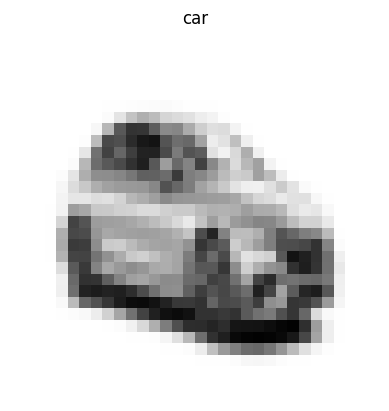

In [50]:
pred = model(tensor_im.unsqueeze(dim=0))
pred_class = torch.argmax(pred, dim = 1)
plt.imshow(tensor_2_im(tensor_im, t_type= "rgb"))
plt.axis('off')
plt.title  (classes[pred_class.item()])

In [ ]:
print(classes[9])

In [51]:
from PIL import Image

rasm = Image.open("bird.webp")
test_ts = tfs.Compose([tfs.Resize((32,32)),
    tfs.Grayscale(num_output_channels=3),
                       tfs.ToTensor(),
                       tfs.Normalize(0.5, 0.5)])
tensor_im = test_ts(rasm)
tensor_im.shape

torch.Size([3, 32, 32])

Text(0.5, 1.0, 'bird')

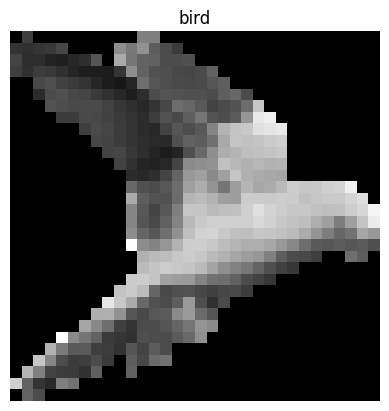

In [52]:
pred = model(tensor_im.unsqueeze(dim=0))
pred_class = torch.argmax(pred, dim = 1)
plt.imshow(tensor_2_im(tensor_im, t_type= "grey"))
plt.axis('off')
plt.title (classes[pred_class.item()])

In [ ]:
print(classes[2])

In [53]:
 from PIL import Image

rasm = Image.open("111 - Copy.jpeg")
test_ts = tfs.Compose([tfs.Resize((32,32)),
    tfs.Grayscale(num_output_channels=3),
                       tfs.ToTensor(),
                       tfs.Normalize(0.5, 0.5)])
tensor_im = test_ts(rasm)
tensor_im.shape

torch.Size([3, 32, 32])

Text(0.5, 1.0, 'bird')

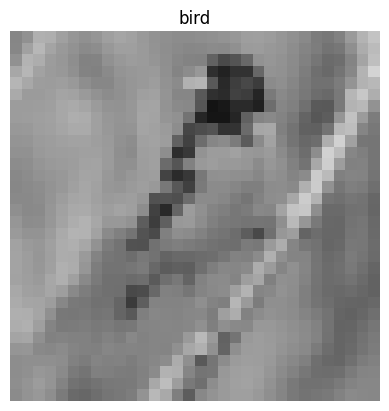

In [54]:
pred = model(tensor_im.unsqueeze(dim=0))
pred_class = torch.argmax(pred, dim = 1)
plt.imshow(tensor_2_im(tensor_im, t_type= "grey"))
plt.axis('off')
plt.title (classes[pred_class.item()])

In [ ]:
print(classes[2])

In [55]:
 from PIL import Image

rasm = Image.open("ship1.jpeg")
test_ts = tfs.Compose([tfs.Resize((32,32)),
    tfs.Grayscale(num_output_channels=3),
                       tfs.ToTensor(),
                       tfs.Normalize(0.5, 0.5)])
tensor_im = test_ts(rasm)
tensor_im.shape

torch.Size([3, 32, 32])

Text(0.5, 1.0, 'ship')

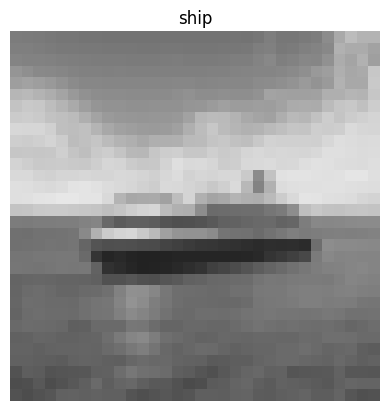

In [56]:
pred = model(tensor_im.unsqueeze(dim=0))
pred_class = torch.argmax(pred, dim = 1)
plt.imshow(tensor_2_im(tensor_im, t_type= "grey"))
plt.axis('off')
plt.title (classes[pred_class.item()])

In [ ]:
print(classes[2])